# Cosmic Impacts

Without using machine learning, you have to try and characterise incoming particle detections as either cosmic rays (originating outside the solar system, often from distant supernova) or as stellar ejecta (particle spat out by the sun).

For this test, you only have one particle to classify, which impacted with an energy of 1200 MeV.

To help you out, you have a dataset containing stellar ejecta and cosmic rays, located in `cosmic_data.txt`. It contains two columns, the first, the energy of the impact in MeV, and the second the probability it was from solar ejecta.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

data = np.loadtxt("cosmic_data.txt")
test = 1200
print(data.shape)
print(data[:2, :])

(20000, 2)
[[1.1943876e+03 1.1170000e-01]
 [1.2317047e+03 4.5040000e-01]]


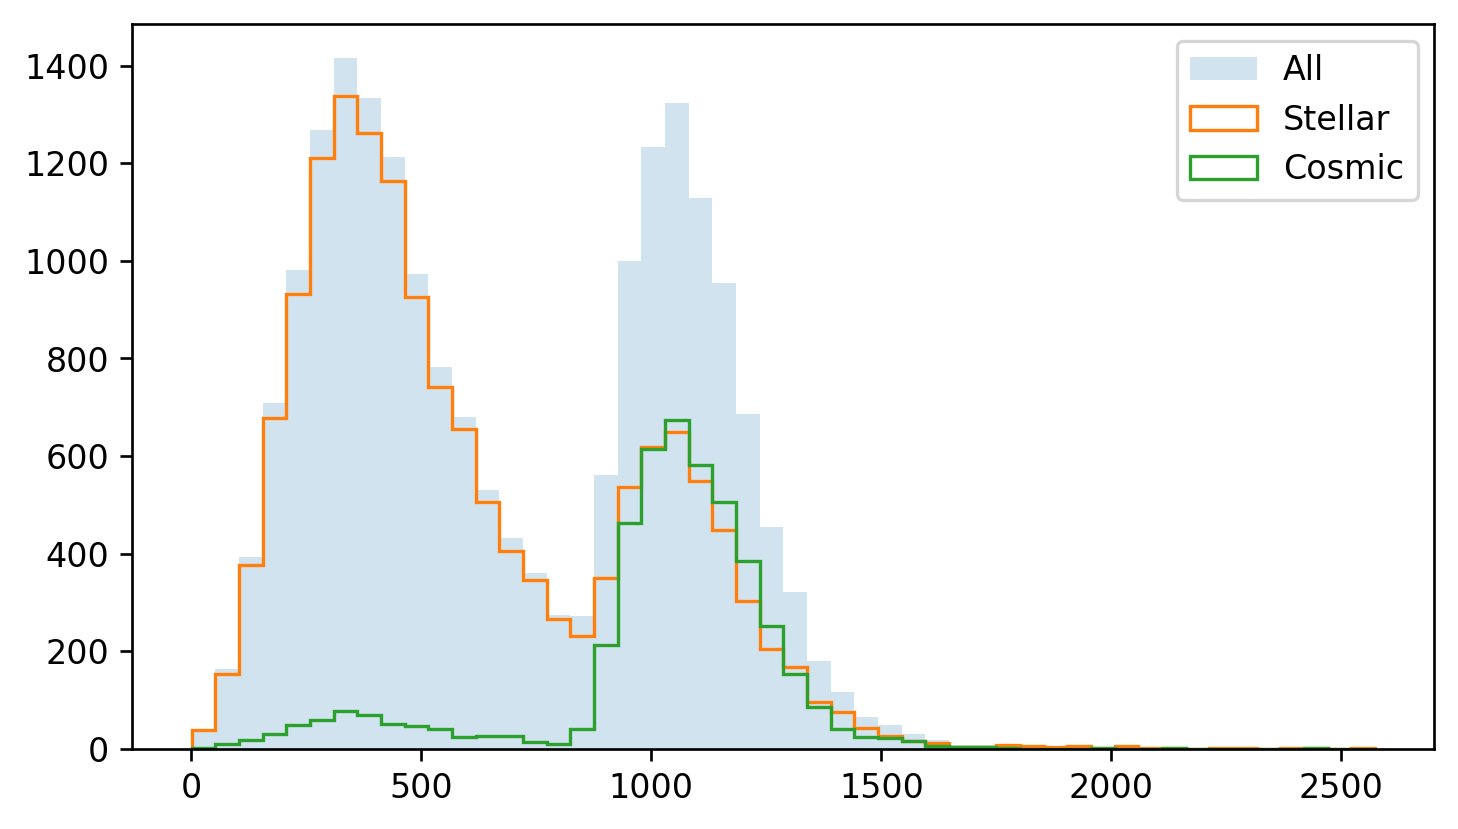

In [7]:
stellar, cosmic = data[:, 0][data[:, 1] > 0.5], data[:, 0][data[:, 1] < 0.5]

_, bins, _ = plt.hist(data[:, 0], alpha=0.2, label="All", bins=50)
plt.hist(stellar, bins=bins, histtype="step", label="Stellar")
plt.hist(cosmic, bins=bins, histtype="step", label="Cosmic")
plt.legend();

This doesn't look too good does it. Seems like there are two populations, however there are contaminants. Let's throw away some of the more uncertain data.

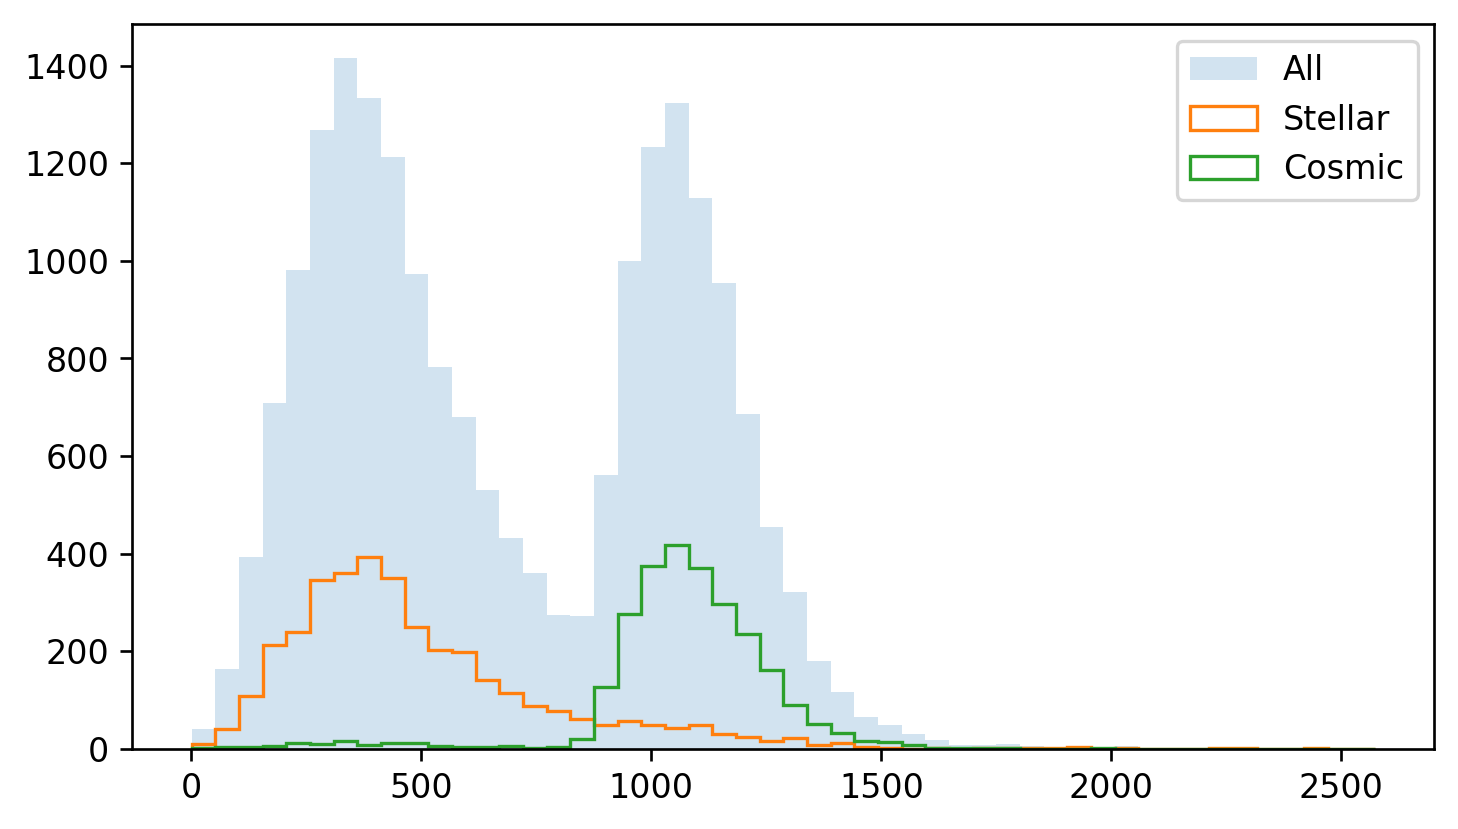

In [8]:
stellar, cosmic = data[:, 0][data[:, 1] > 0.9], data[:, 0][data[:, 1] < 0.1]
n_stellar, n_cosmic = stellar.shape[0], cosmic.shape[0]

_, bins, _ = plt.hist(data[:, 0], alpha=0.2, label="All", bins=50)
plt.hist(stellar, bins=bins, histtype="step", label="Stellar")
plt.hist(cosmic, bins=bins, histtype="step", label="Cosmic")
plt.legend();

Alright, looks like we've remove a lot of contamination. So now lets try and quantify each distribution. In most cases, start simple and then add complexity only when needed.

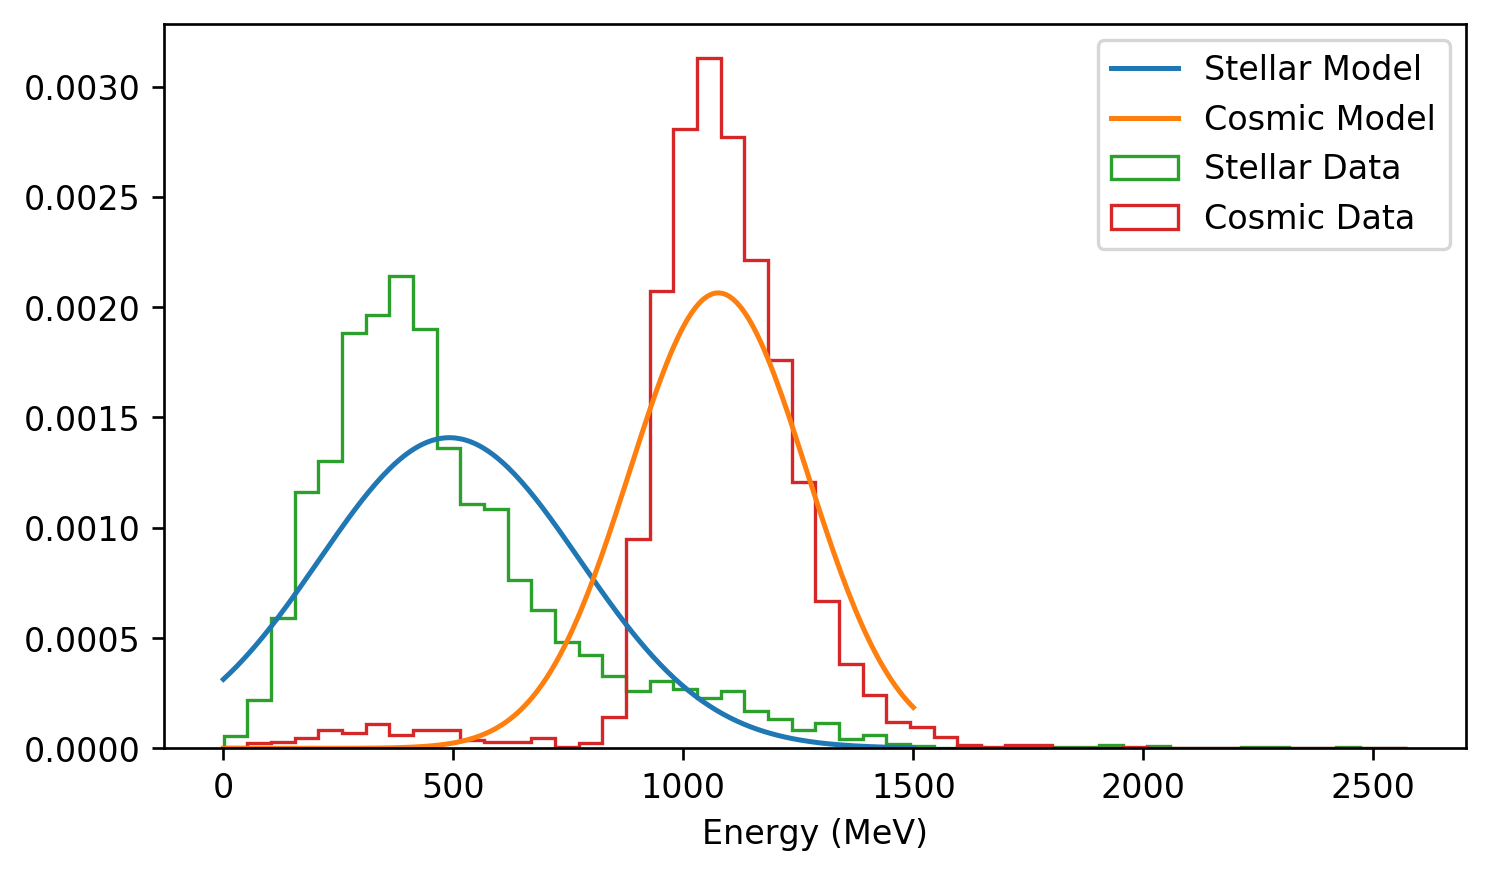

In [9]:
# Testing normals
params_s = st.norm.fit(stellar)
params_c = st.norm.fit(cosmic)

# visualise
xs = np.linspace(0, 1500, 200)
p_s = st.norm.pdf(xs, *params_s)
p_c = st.norm.pdf(xs, *params_c)
plt.plot(xs, p_s, label="Stellar Model")
plt.plot(xs, p_c, label="Cosmic Model")
plt.hist(stellar, bins=bins, histtype="step", density=True, label="Stellar Data")
plt.hist(cosmic, bins=bins, histtype="step", density=True, label="Cosmic Data")
plt.legend()
plt.xlabel("Energy (MeV)");

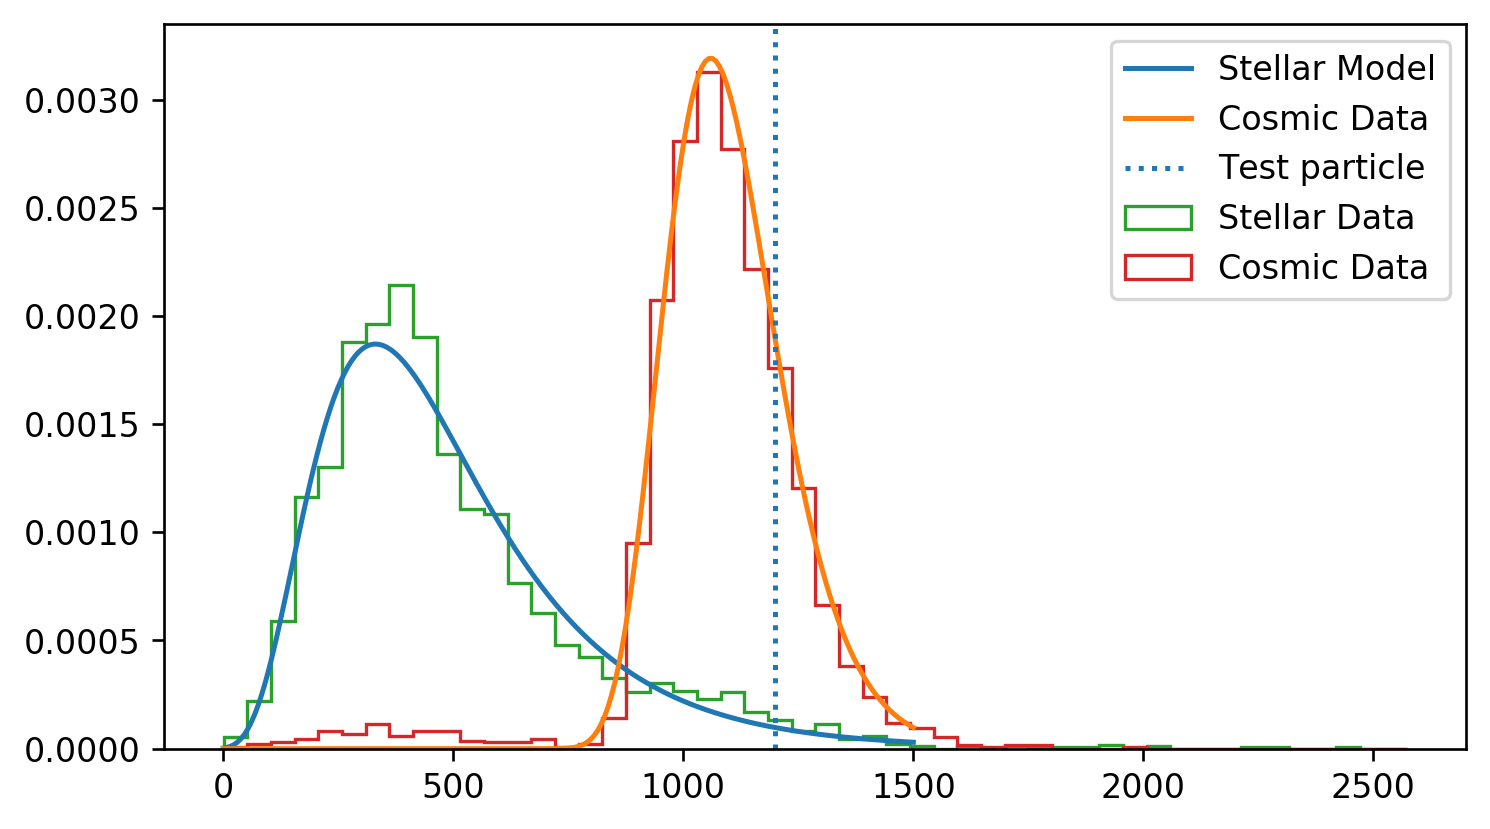

In [10]:
# Testing normals
params_s = st.lognorm.fit(stellar, loc=400, scale=100)
cosmic2 = cosmic[cosmic > 700]
params_c = st.lognorm.fit(cosmic2, loc=1300, scale=100)

# visualise
xs = np.linspace(0, 1500, 200)
p_s = st.lognorm.pdf(xs, *params_s)
p_c = st.lognorm.pdf(xs, *params_c)
plt.plot(xs, p_s, label="Stellar Model")
plt.plot(xs, p_c, label="Cosmic Data")
plt.hist(stellar, bins=bins, histtype="step", density=True, label="Stellar Data")
plt.hist(cosmic, bins=bins, histtype="step", density=True, label="Cosmic Data")
plt.axvline(test, ls=":", label="Test particle")
plt.legend();

Now, if we want the probability that the detection is one particle type or the other, we can't just take a ratio between the two, because that would assume we get the same number of stellar and cosmic ray particles, which isn't true. It looks true in the above plot, because we're plotting probabilities, which are normalised to unit area. 

We need to take the different rates into account, like this:

In [11]:
prob_cosmic = st.lognorm.pdf(test, *params_c) * n_cosmic
prob_stellar = st.lognorm.pdf(test, *params_s) * n_stellar
total_prob = prob_cosmic + prob_stellar

final = prob_cosmic / total_prob
print(f"The final probability of this being a cosmic ray is {100 * final:.1f}%")

The final probability of this being a cosmic ray is 93.4%


Take that machine learning! We don't need you!